# Тема 2. DataFrame

**В файле Priem.csv содержится датасет с данными абитурентов. Давайте поработаем с ним!**

In [4]:
import pandas as pd
import phik
import plotly.express as px

In [5]:
df = pd.read_csv('Priem.csv', encoding='utf-8')
df.head(3)

,Пол,Сумма.баллов,ЕГЭ...матем.,ЕГЭ...рус.яз.,Аттестат.с.отличием.оценка,ГТО.оценка,Сочинение.оценка,Регион,Тип.насел..пункта,Дата.рождения,День.рождения,Месяц.рождения
0,МУЖСКОЙ,388,90.0,98.0,5,0,1,Красноярский край,ГОРОД,24.09.1998,24,9
1,ЖЕНСКИЙ,351,84.0,87.0,0,0,2,Чувашская Респ,ЦЕНТР СУБЪЕКТА ФЕДЕРАЦИИ,14.02.1997,14,2
2,ЖЕНСКИЙ,355,94.0,91.0,5,0,2,Москва г,ГОРОД ФЕДЕРАЛЬНОГО ЗНАЧЕНИЯ,25.03.2000,25,3


interval columns not set, guessing: ['Сумма.баллов', 'ЕГЭ...матем.', 'ЕГЭ...рус.яз.', 'Аттестат.с.отличием.оценка', 'ГТО.оценка', 'Сочинение.оценка', 'День.рождения', 'Месяц.рождения']


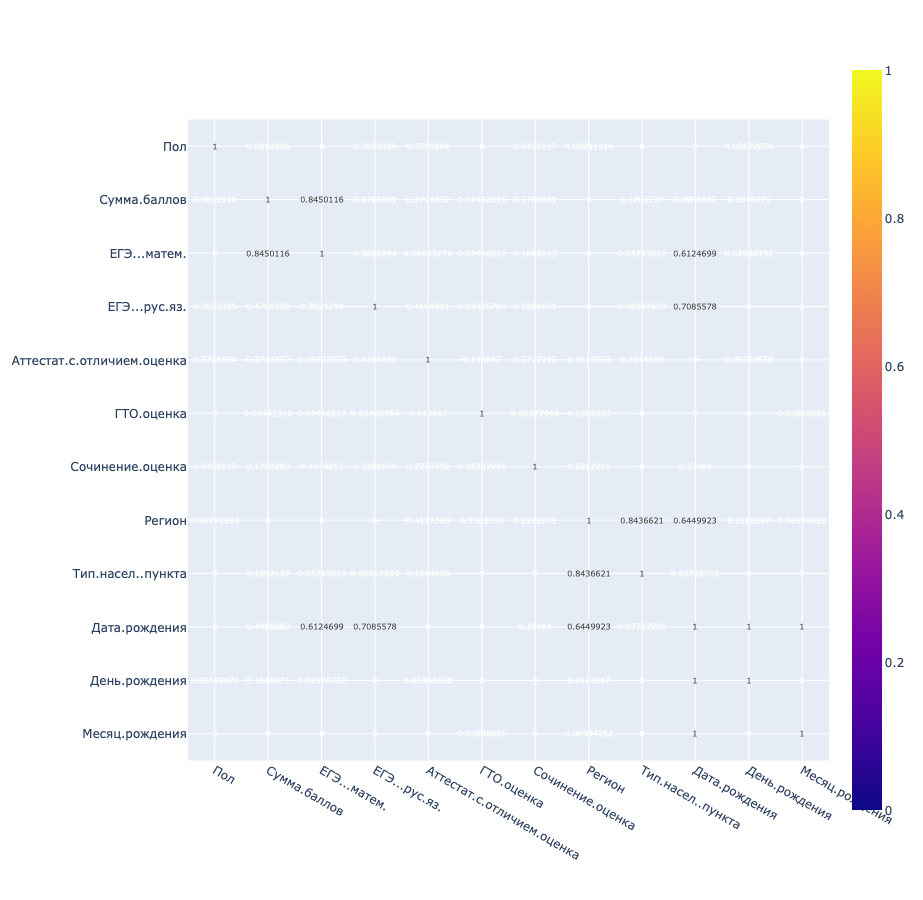

In [8]:
px.imshow(df.phik_matrix(), text_auto=True, width=1000, height=900)

### 1 Задание

In [3]:
print('Число строк и столбцов датасета: ', df.shape)
print('Название 3-го столбца: ', df.columns[2])
print('Баллы ЕГЭ по математике и русскому у 7-го абитуриента:', df.iloc[6][['ЕГЭ...матем.', 'ЕГЭ...рус.яз.']], sep='\n')

Число строк и столбцов датасета:  (1390, 12)
Название 3-го столбца:  ЕГЭ...матем.
Баллы ЕГЭ по математике и русскому у 7-го абитуриента:
ЕГЭ...матем.     90.0
ЕГЭ...рус.яз.    98.0
Name: 6, dtype: object


In [4]:
# 5-ая строка
df.iloc[4]

Пол                                               МУЖСКОЙ
Сумма.баллов                                          349
ЕГЭ...матем.                                         82.0
ЕГЭ...рус.яз.                                        93.0
Аттестат.с.отличием.оценка                              5
ГТО.оценка                                              0
Сочинение.оценка                                        2
Регион                                           Москва г
Тип.насел..пункта             ГОРОД ФЕДЕРАЛЬНОГО ЗНАЧЕНИЯ
Дата.рождения                                  12.12.1999
День.рождения                                          12
Месяц.рождения                                         12
Name: 4, dtype: object

In [14]:
# 5 высокобалльников по математике, начиная с 32-го:
mathematicians = df[df['ЕГЭ...матем.'] > 98]
mathematicians.iloc[31:36]

,Пол,Сумма.баллов,ЕГЭ...матем.,ЕГЭ...рус.яз.,Аттестат.с.отличием.оценка,ГТО.оценка,Сочинение.оценка,Регион,Тип.насел..пункта,Дата.рождения,День.рождения,Месяц.рождения,Матем.лучше.рус
355,МУЖСКОЙ,396,100.0,93.0,0,0,3,Москва г,ГОРОД ФЕДЕРАЛЬНОГО ЗНАЧЕНИЯ,07.06.1999,7,6,Да
382,МУЖСКОЙ,344,99.0,96.0,5,0,2,Московская обл,ГОРОД,17.04.2000,17,4,Да
389,ЖЕНСКИЙ,359,99.0,98.0,0,0,3,Московская обл,ГОРОД,27.01.1999,27,1,Да
395,МУЖСКОЙ,351,99.0,96.0,0,0,2,Москва г,ГОРОД ФЕДЕРАЛЬНОГО ЗНАЧЕНИЯ,09.10.1999,9,10,Да
407,ЖЕНСКИЙ,376,100.0,91.0,5,0,3,Москва г,ГОРОД ФЕДЕРАЛЬНОГО ЗНАЧЕНИЯ,14.04.2000,14,4,Да


### 2 Задание

Выведите баллы ЕГЭ у первых 5 абитуриентов.

In [6]:
df.loc[:, df.columns.str.startswith('ЕГЭ')].head()

,ЕГЭ...матем.,ЕГЭ...рус.яз.
0,90.0,98.0
1,84.0,87.0
2,94.0,91.0
3,76.0,88.0
4,82.0,93.0


Добавьте столбец, в котором стоит "Да", если балл по математике больше балла по русскому, и "Нет" иначе.

In [7]:
# df.insert(pos, name, series, allow_duplicates=False)
# new_df = df.assign(name1=lambda _df: _df['ЕГЭ...матем.'] > _df['ЕГЭ...рус.яз.'], name2=100500, ...)
new_column_name = 'Матем.лучше.рус'
df[new_column_name] = (df['ЕГЭ...матем.'] > df['ЕГЭ...рус.яз.']).apply(lambda b: 'Да' if b else 'Нет')
df.tail()[['ЕГЭ...матем.', 'ЕГЭ...рус.яз.', new_column_name]]

,ЕГЭ...матем.,ЕГЭ...рус.яз.,Матем.лучше.рус
1385,100.0,98.0,Да
1386,92.0,93.0,Нет
1387,100.0,93.0,Да
1388,76.0,98.0,Нет
1389,100.0,96.0,Да


Создайте новый датасет из абитуриентов со средним баллом ЕГЭ выше 95.

In [8]:
high_scorers = df[df.loc[:, df.columns.str.startswith('ЕГЭ')].mean(axis=1) > 95]
high_scorers.head()

,Пол,Сумма.баллов,ЕГЭ...матем.,ЕГЭ...рус.яз.,Аттестат.с.отличием.оценка,ГТО.оценка,Сочинение.оценка,Регион,Тип.насел..пункта,Дата.рождения,День.рождения,Месяц.рождения,Матем.лучше.рус
10,ЖЕНСКИЙ,399,96.0,100.0,5,0,2,Москва г,ГОРОД ФЕДЕРАЛЬНОГО ЗНАЧЕНИЯ,13.11.1999,13,11,Нет
16,МУЖСКОЙ,388,96.0,98.0,0,0,0,Москва г,ГОРОД ФЕДЕРАЛЬНОГО ЗНАЧЕНИЯ,15.02.2000,15,2,Нет
19,ЖЕНСКИЙ,364,94.0,100.0,5,0,3,Москва г,ГОРОД ФЕДЕРАЛЬНОГО ЗНАЧЕНИЯ,10.04.1999,10,4,Нет
20,МУЖСКОЙ,375,100.0,93.0,5,0,2,Москва г,ГОРОД ФЕДЕРАЛЬНОГО ЗНАЧЕНИЯ,05.08.1999,5,8,Да
37,МУЖСКОЙ,393,100.0,96.0,0,0,1,Москва г,ГОРОД ФЕДЕРАЛЬНОГО ЗНАЧЕНИЯ,15.02.2000,15,2,Да


### 3 Задание

Вывести средние баллы девочек и мальчиков.

In [19]:
df.groupby('Пол').agg(dict.fromkeys(df.columns[df.columns.str.startswith('ЕГЭ')], 'mean'))

,ЕГЭ...матем.,ЕГЭ...рус.яз.
Пол,,
ЖЕНСКИЙ,85.339056,89.371245
МУЖСКОЙ,85.393906,85.161781


Вывести средние баллы, имеющих аттестат с отличием и нет.

In [10]:
df.groupby('Аттестат.с.отличием.оценка').agg(dict.fromkeys(df.columns[df.columns.str.startswith('ЕГЭ')], 'mean'))

,ЕГЭ...матем.,ЕГЭ...рус.яз.
Аттестат.с.отличием.оценка,,
0,84.854265,84.435503
5,86.188540,89.913284


А теперь замиксуем.

In [11]:
df.groupby(['Пол', 'Аттестат.с.отличием.оценка']).agg(dict.fromkeys(df.columns[df.columns.str.startswith('ЕГЭ')], 'mean'))

ЕГЭ...матем.  ЕГЭ...рус.яз.
Пол     Аттестат.с.отличием.оценка                             
ЖЕНСКИЙ 0                              84.810680      86.883495
        5                              85.757692      91.342308
МУЖСКОЙ 0                              84.868339      83.646322
        5                              86.587189      88.595745

Определить количество студентов с баллом ЕГЭ по математике, лежащем в заданном диапазоне и вне его.

In [12]:
l, r = 80, 90
df['ЕГЭ...матем.'].between(l, r).value_counts()

ЕГЭ...матем.
True     764
False    626
Name: count, dtype: int64

Создать датасет с количествами студентов, баллы которых лежат в заданных диапазонах.

In [13]:
df.assign(cnt=1, \
          math_in_interval=lambda _df: _df['ЕГЭ...матем.'].between(60, 70), \
          rus_in_interval=lambda _df: _df['ЕГЭ...рус.яз.'] >= 90) \
  .groupby(['math_in_interval', 'rus_in_interval']) \
  .agg({'cnt': 'count', \
        'ЕГЭ...матем.': ['mean', 'median'], \
        'ЕГЭ...рус.яз.': ['mean', 'median']})

cnt ЕГЭ...матем.        ЕГЭ...рус.яз.  \
                                 count         mean median          mean   
math_in_interval rus_in_interval                                           
False            False             783     84.95122   86.0     81.158974   
                 True              565     87.20922   88.0     94.223009   
True             False              32     68.56250   68.0     80.968750   
                 True               10     68.80000   68.0     95.000000   

                                         
                                 median  
math_in_interval rus_in_interval         
False            False             83.0  
                 True              93.0  
True             False             81.0  
                 True              96.0